In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
plt.rcParams["figure.figsize"] = (12,7)

# Домашнее задание по курсу анализа данных
Версия от 12.10.2021

Всего 50 баллов = 40 основных + 10 дополнительных

**Оценка**  = (Количество баллов за работу*2 + 20)/10

**Мягкий дедлайн: 30.10.2021  23:59**

**Жесткий дедлайн: 6.11.2021  23:59**

Присылать решение ссылкой на ваш **github** в телеграмм **@Aleron75** или на почту **milenkin.aa@phystech.edu**

**Автор:** Миленькин Александр

In [3]:
df = pd.read_csv('../data/people_data_clustering.csv', index_col=0)
print('Размеры',df.shape)
df.head()

Размеры (6000, 9)


,id,was_married,childrens,salary,sex,age,profession,home_cost,drive_info
0,0,1,4.0,45032.40,1,82.0,Engineer,1.003674e+07,NaN
1,1,1,2.0,202004.64,1,32.0,Doctor,1.014051e+07,0.0
2,2,1,6.0,213158.75,1,14.0,Entertainment,1.043318e+07,NaN
3,3,0,1.0,185692.78,0,10.0,Lawyer,1.004299e+07,NaN
4,4,1,9.0,132067.32,1,99.0,Artist,1.021908e+07,NaN


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `childrens` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол
* `age` - Возраст
* `home_cost` - Стоимость жилья
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет и, используя класстерный анализ, разбить пользователей на сегменты. Сделать выводы о причинах такой кластеризации.

# Изучение датасета (5 баллов)
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки бинарные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           6000 non-null   int64  
 1   was_married  6000 non-null   int64  
 2   childrens    6000 non-null   float64
 3   salary       6000 non-null   float64
 4   sex          6000 non-null   int64  
 5   age          6000 non-null   float64
 6   profession   6000 non-null   object 
 7   home_cost    6000 non-null   float64
 8   drive_info   3230 non-null   float64
dtypes: float64(5), int64(3), object(1)
memory usage: 468.8+ KB


Видим что, за исключением profession, все признаки численные. Посмотрим на profession:

In [5]:
unique = df["profession"].nunique()
print(f"Признак profession - категориальный, уникальных значений - {unique}\nЗначения признака и количество объектов с данными значениями:")
df["profession"].value_counts()

Признак profession - категориальный, уникальных значений - 9
Значения признака и количество объектов с данными значениями:


Healthcare       680
Homemaker        674
Lawyer           670
Artist           669
Entertainment    668
Marketing        666
Executive        660
Doctor           658
Engineer         655
Name: profession, dtype: int64

Найдем остальные категориальные признаки:

In [6]:
unique = df["sex"].nunique()
print(f"Признак sex - категориальный, уникальных значений - {unique}\nЗначения признака и количество объектов с данными значениями:")
df["sex"].value_counts()

Признак sex - категориальный, уникальных значений - 2
Значения признака и количество объектов с данными значениями:


1    3971
0    2029
Name: sex, dtype: int64

In [7]:
unique = df["was_married"].nunique()
print(f"Признак was_married - категориальный, уникальных значений - {unique}\nЗначения признака и количество объектов с данными значениями:")
df["was_married"].value_counts()

Признак was_married - категориальный, уникальных значений - 2
Значения признака и количество объектов с данными значениями:


1    5052
0     948
Name: was_married, dtype: int64

In [8]:
unique = df["drive_info"].nunique()
print(f"Признак drive_info - категориальный, уникальных значений - {unique}\nЗначения признака и количество объектов с данными значениями:")
df["drive_info"].value_counts()

Признак drive_info - категориальный, уникальных значений - 2
Значения признака и количество объектов с данными значениями:


1.0    2355
0.0     875
Name: drive_info, dtype: int64

Пизнаки "sex", was_married" и "drive_info" - бинарные. Посмотрим на гистограммы численных некатегориальных признаков:

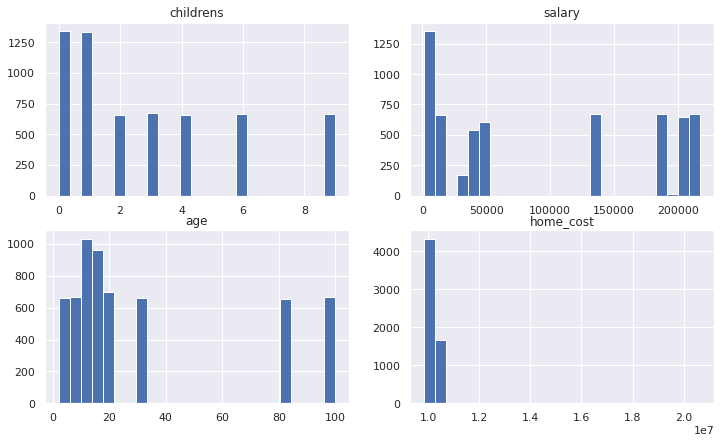

In [9]:
feats = ["childrens", "salary", "age", "home_cost"]
plt.figure(figsize=(12, 7))
for i in range(4):
    plt.subplot(2, 2, i+1)
    df[feats[i]].hist(bins=25)
    plt.title(feats[i])

Пока что не очень понятно, у какого из признаков нормальное распределение. Вернемся к этому вопросу после чистки датасета

# Чистка датасета (5 баллов)
* Есть ли дубли в данных? 
* Есть ли пропуски в данных? 
* Как стоит поступить с выбросами? (удалить или заменить \ `dropna()` или `fillna()` ) - **насколько я знаю, эти функции относятся к пропускам в данных, а не к выбросам. Если вопрос про пропуски, то удобнее просто удалить столбец drive_info их содержащий**
* Удалить бесмысленные признаки (`drop()`)
* Найти и удалить выбросы по признаку `home_cost`. Сколько их?

Бессмысленные признаки - id(т.к. не несёт никакой информации о человеке) и drive_info(так как у половины жителей этот признак отсутствует)

In [10]:
df = df.drop(['drive_info', 'id'], axis=1)

In [11]:
df.head()

,was_married,childrens,salary,sex,age,profession,home_cost
0,1,4.0,45032.40,1,82.0,Engineer,1.003674e+07
1,1,2.0,202004.64,1,32.0,Doctor,1.014051e+07
2,1,6.0,213158.75,1,14.0,Entertainment,1.043318e+07
3,0,1.0,185692.78,0,10.0,Lawyer,1.004299e+07
4,1,9.0,132067.32,1,99.0,Artist,1.021908e+07


Найдем и удалим дубли в данных:

In [12]:
print(f"В датасете {df[df.duplicated()].shape[0]} дублей. Удалим их")
df = df.drop_duplicates()

В датасете 500 дублей. Удалим их


Смотрим пропуски:

In [13]:
df.isnull().sum()

was_married    0
childrens      0
salary         0
sex            0
age            0
profession     0
home_cost      0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

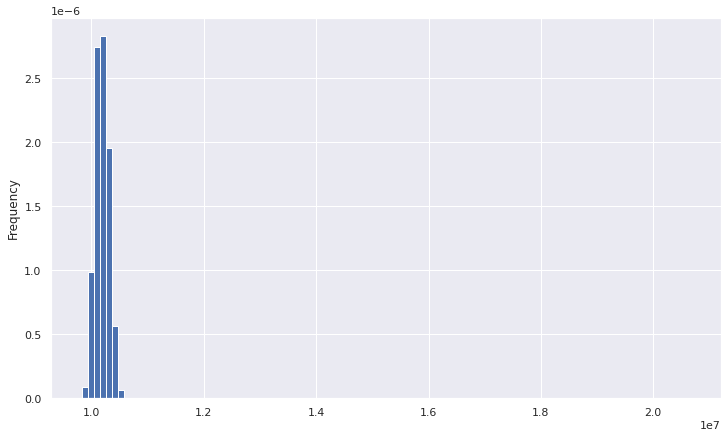

In [14]:
df["home_cost"].plot.hist(bins=100, density=True)

Посмотрим, как изменится гистограмма, когда мы удалим все объекты с home_cost больше 99.5 персентиля или меньше 0.5 персентиля

In [15]:
q99 = df["home_cost"].quantile(0.995)
q1 = df["home_cost"].quantile(0.005)
df = df[(df["home_cost"] < q99) & (df["home_cost"] > q1)]

<AxesSubplot:ylabel='Frequency'>

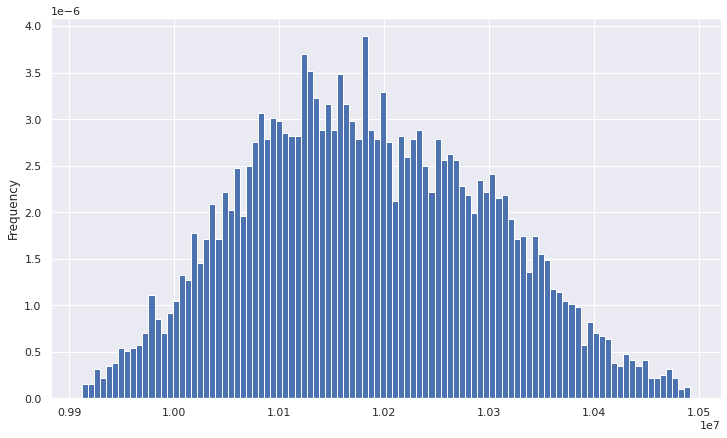

In [16]:
df["home_cost"].plot.hist(bins=100, density=True)

Так гораздо лучше. И даже похоже на нормальное распределение. Проверим c помощью q-q plot:

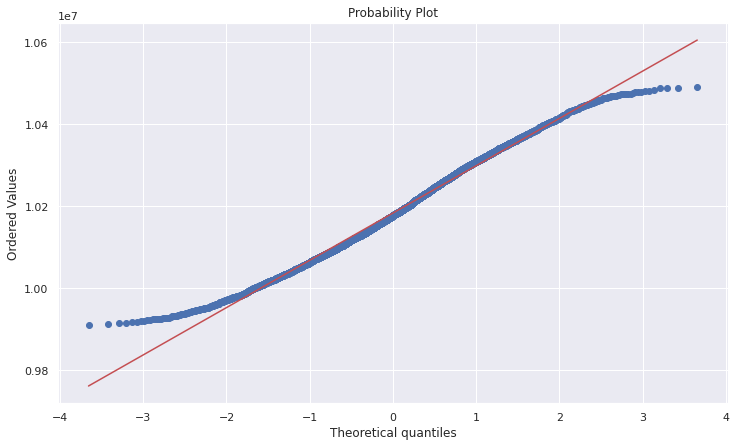

In [17]:
scipy.stats.probplot(df["home_cost"], dist="norm", plot=plt)
plt.show()

Предположение подтвердилось

# Изучение зависимых признаков (5 балла). 
* Построить матрицу корреляций
* Визуализировать матрицу корреляции с помощью heatmap
* Сделать выводы по самым скоррелированные признакам
* Построить график зависимости между двумя самыми зависимыми признаками



Построим матрицу корреляции

In [18]:
cor_mat = df.corr()
cor_mat

,was_married,childrens,salary,sex,age,home_cost
was_married,1.000000,0.242698,-0.501297,0.337853,0.201197,-0.343343
childrens,0.242698,1.000000,0.393355,0.385567,0.744445,0.286431
salary,-0.501297,0.393355,1.000000,0.243153,0.076947,0.709933
sex,0.337853,0.385567,0.243153,1.000000,0.341018,0.178776
age,0.201197,0.744445,0.076947,0.341018,1.000000,0.057783
home_cost,-0.343343,0.286431,0.709933,0.178776,0.057783,1.000000


Посмотрим на её визуализацию

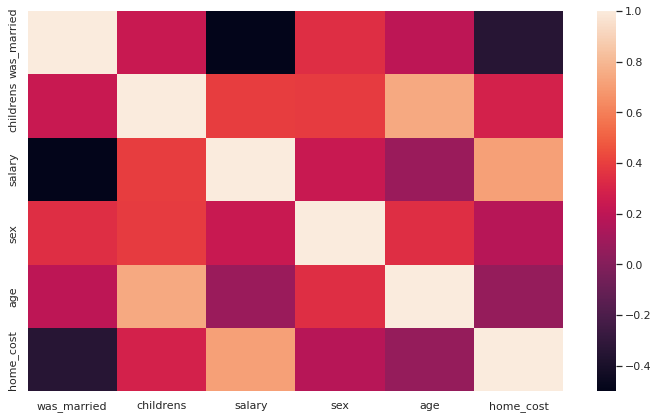

In [19]:
sns.heatmap(cor_mat);

Больше всего скорелированны - childrens и age, salary и home_cost (что, в принципе, логично). Давайте посмотрим на графики зависимостей:

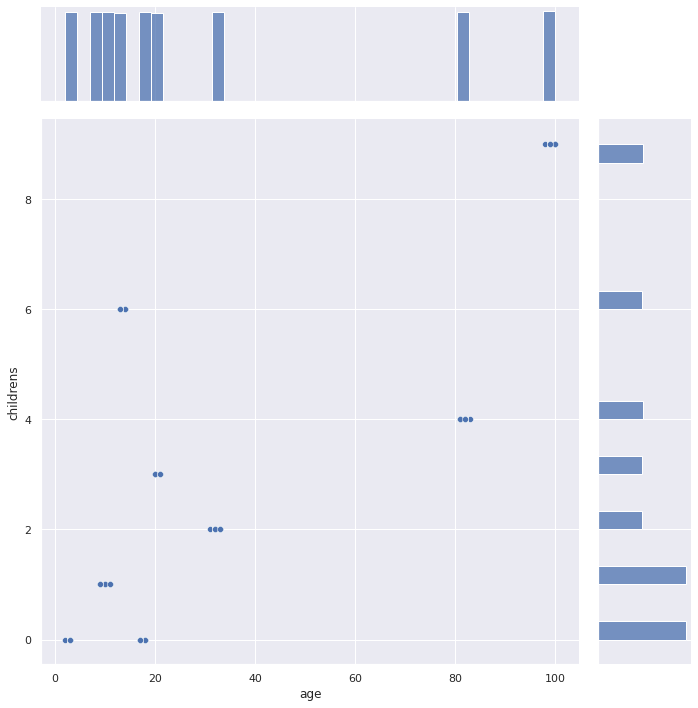

In [20]:
sns.jointplot(x="age", y="childrens", data=df, kind="scatter", height=10);

# Нормировка признаков (3 балла)
* Отнормировать данные
* Обосновать выбор нормировки

In [21]:
# Вспомогательные код

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 

scalers = StandardScaler(), MinMaxScaler(), RobustScaler()

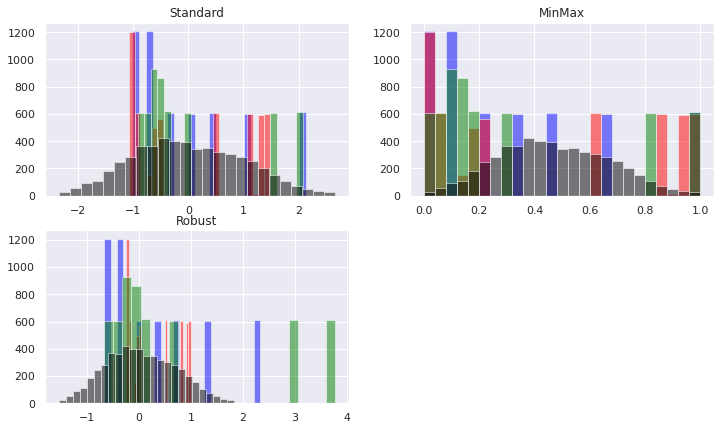

In [23]:
sc = ["Standard", "MinMax", "Robust"]
for i in range(3):
    normal_data = scalers[i].fit_transform(df[feats])
    plt.subplot(2, 2, i+1)
    plt.hist(normal_data[:, 0], bins=25, alpha=0.5, color='blue')
    plt.hist(normal_data[:, 1], bins=25, alpha=0.5, color='red')
    plt.hist(normal_data[:, 2], bins=25, alpha=0.5, color='green')
    plt.hist(normal_data[:, 3], bins=25, alpha=0.5, color='black')
    plt.title(sc[i])

В стандартной нормировке - признак home_cost будет вносить большие влияние, так как оно имеет самый большой размах, Robust - выделяет признаки age и childrens, MinMax - все признаки в одно размахе. Поэтому возьмём MinMax

In [24]:
normal_data = scalers[2].fit_transform(df[feats])

# Выделить кластеры (6 баллов)
* Определить оптимальное количество кластеров с помощью правила локтя/осыпи
* Получить номера класстеров для каждого пользователя. 

Применим правило локтя и еще посмотрим коэффициент силуета

Text(0.5, 0, 'Количество кластеров')

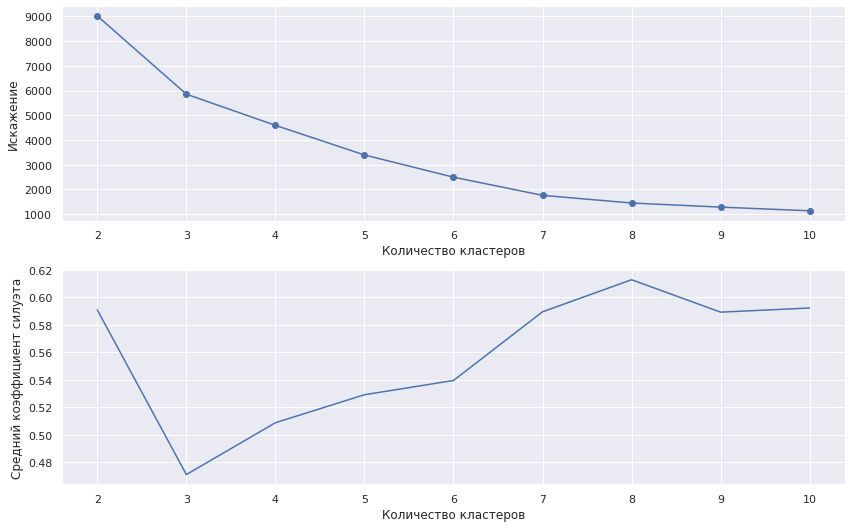

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

normal_data = np.append(normal_data, df[["was_married", "sex"]].values, axis = 1)
distortions = []
silhouette_avg = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=20, 
                max_iter=500, 
                random_state=42)
    km.fit(normal_data)
    distortions.append(km.inertia_)
    silhouette_avg.append(np.mean(silhouette_samples(normal_data, km.predict(normal_data), metric='euclidean')))
    
plt.subplot(2, 1, 1)    
plt.plot(range(2, 11), distortions, marker='o')
plt.xlabel('Количество кластеров')
plt.ylabel('Искажение')
plt.tight_layout()
plt.subplot(2, 1, 2)
plt.plot(range(2, 11), silhouette_avg)
plt.ylabel('Средний коэффициент силуэта')
plt.xlabel("Количество кластеров")

Видим, что оптимальное количество кластеров равно 8

In [26]:
km = KMeans(n_clusters=8, init='k-means++', n_init=20, max_iter=500, random_state=42)
cluster_labels = km.fit_predict(normal_data)

# Снизить разерность (6 баллов)

Воспользуйтесь методом `t-SNE ()` (или `PCA`, `U-MAP`)

ссылка на документацию:
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [27]:
# Вспомогательные код

from sklearn.manifold import TSNE

data_x_y = TSNE(n_components=2, learning_rate='auto',
                 random_state=22, n_jobs=-1, 
                 init='random').fit_transform(normal_data)

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['profession'] = le.fit_transform(df.profession)

# Нарисовать полученные кластеры (10 баллов)

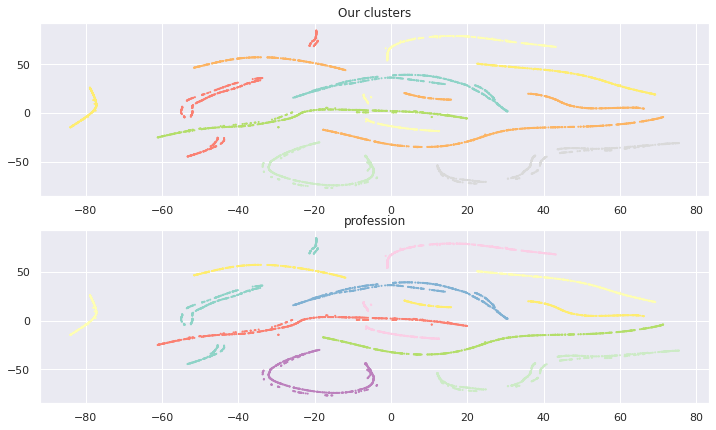

In [31]:
# Вспомогательные код

# import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.scatter(data_x_y[:, 0], data_x_y[:,1], c=cluster_labels, cmap ='Set3', s=1)
plt.title("Our clusters")
plt.subplot(2, 1, 2)
plt.scatter(data_x_y[:, 0], data_x_y[:,1], c=df["profession"], s=1, cmap ='Set3')
plt.title("profession")
plt.show()

# Дополнительные баллы (+10 баллов)
* Аккуратный и понятный код **+5 баллов**
* Присутствуют лаконичные и понятные комментарии **+5 балов**

😎✌😎✌😎✌😎✌😎✌😎✌😎✌😎✌😎✌😎✌😎✌😎✌😎✌😎✌😎✌😎✌😎✌😎✌😎✌😎✌😎✌😎✌😎✌😎✌😎✌😎✌😎✌😎✌😎✌😎✌